# Block Collision Model and Test

## Calvin Hewitt and Caeson Reckling

## Introduction:

Here we model the collison of two wooden blocks of varying masses. We have written a computer code to model the velocity, position, and acceleration of the blocks across a period of time. The code accepts varying masses in kilograms, an impulse period in seconds, and an average force applied accross this period. Using two 5 N spring scales as propulsion, we will launch the first block into the second while the second is at rest. We will compare our models predictions with the measurements taken in our system. 

## Code Description 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def springsystem(m1,m2,ct,fc):
    k=2*(5/0.05) #5 cm compression = 5 N
    dt=0.0001 #time step for Euler's method
    mu=0.3 #coefficient of friction of varnished wood
    x1=[-0.05] #initialize x or distance
    x2=[0.1]
    t1=[0]
    t2=[0]
    fsp=[-k*x1[-1]] #spring force over 5 cm compression
    ff1=m1*9.8*mu #force of firction block two
    ff2=m2*9.8*mu #force of friction block one 
    v1=[0] #velocity of block one
    v2=[0]  #velocity of block two
    a1=[0]
    a2=[0]
    
    while(x1[-1]<0): #period of acceleration by spring
        t1.append(t1[-1]+dt)
        t2.append(t2[-1]+dt)
        fsp.append(-k*x1[-1])
        a1.append((fsp[-1]-ff1)/m1)
        v1.append(v1[-1]+a1[-1]*dt)
        x1.append(x1[-1]+v1[-1]*dt)
        a2.append(0)
        v2.append(0)
        x2.append(0.1)
    while(x1[-1]<0.05): #sliding period 
        t1.append(t1[-1]+dt)
        t2.append(t2[-1]+dt)
        a1.append(-ff1/m1)
        v1.append(v1[-1]+a1[-1]*dt)
        x1.append(x1[-1]+v1[-1]*dt)
        a2.append(0)
        v2.append(0)
        x2.append(0.1)
    ct1=t1[-1]+ct
    while(t1[-1]<ct1): #moment of collison 
        t1.append(t1[-1]+dt)
        t2.append(t2[-1]+dt)
        a1.append((-fc-ff1)/m1)
        a2.append((fc-ff2)/m2)
        v1.append(v1[-1]+a1[-1]*dt)
        v2.append(v2[-1]+a2[-1]*dt)
        x1.append(x1[-1]+v1[-1]*dt)
        x2.append(x2[-1]+v2[-1]*dt)
    while(v1[-1]>0): #block one coming to a halt
        t1.append(t1[-1]+dt)
        a1.append(-ff1/m1)
        v1.append(v1[-1]+a1[-1]*dt)
        x1.append(x1[-1]+v1[-1]*dt)
    while(v2[-1]>0): # block two coming ot a halt
        t2.append(t2[-1]+dt)
        a2.append(-ff2/m1)
        v2.append(v2[-1]+a2[-1]*dt)
        x2.append(x2[-1]+v2[-1]*dt)
        
    plt.plot(t1,v1)
    plt.title('Velocity Versus Time of First Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity(m/s)')
    
    plt.show()
    plt.plot(t2,v2)
    plt.title('Velocity Versus Time of Second Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity(m/s)')
    
    plt.show()
    plt.plot(t1,x1)
    plt.title('Position Versus Time of First Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    
    plt.show()
    plt.plot(t2,x2)
    plt.title('Position Versus Time of Second Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    
    plt.show()
    plt.plot(t1,a1)
    plt.plot([0,0.12],[0,0])
    plt.title('Acceleration Versus Time of Fist Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    
    plt.show()
    plt.plot(t2,a2)
    plt.title('Acceleration Versus Time of Second Block')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    print('Final Velocity of First Block, Final Velocity of Second Block, Final Time of First Block, Final Time of Second Block, Final Position of the First Block, Final Position of Second Block')
    return(v1[-1],v2[-1],t1[-1],t2[-1], x1[-1], x2[-1])

- The code accepts a mass for block one, a mass for block two, a time period that the two blocks are in contact with one another, and a force of collision. 

- The spring constant was derived from a force of five newtons coming from five centimeters of compression. 

- The code uses Euler's Method of Numerical Analysis to predict the collision distances of the blocks. 

Code Setup:

The code is split into four sections:

- Extension: This refers to the period in which the first block is in contact with the spring scale. The code takes into account friction and the variable nature of the spring's force as the distance from equilibrium position decreases. This time chunk assumes 5 cm of contact as the spring scale extends. 

- Sliding: This refers to the period in which the first block is sliding accross the table. This accounts only for the frictional force slowing the first block down as time progresses. 

- Moment of collision: This refers to the time in which the blocks are in contact with one another. The time period and collision force are given as inputs in the function. The collision force is considered to be positive for the second block and negative for the first. 

- Sliding to a stop: This period consists of two while loops to model the time of the two blocks coming to a stop. 

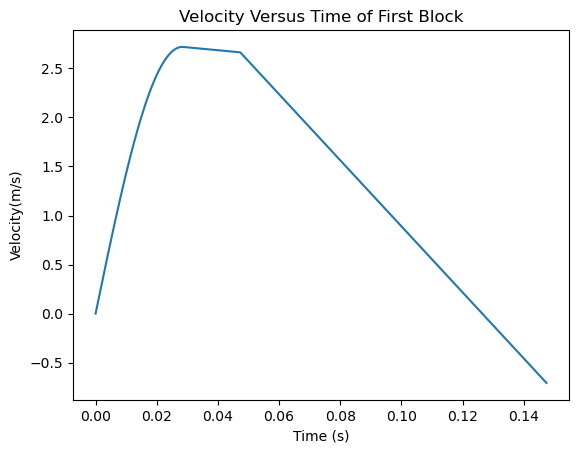

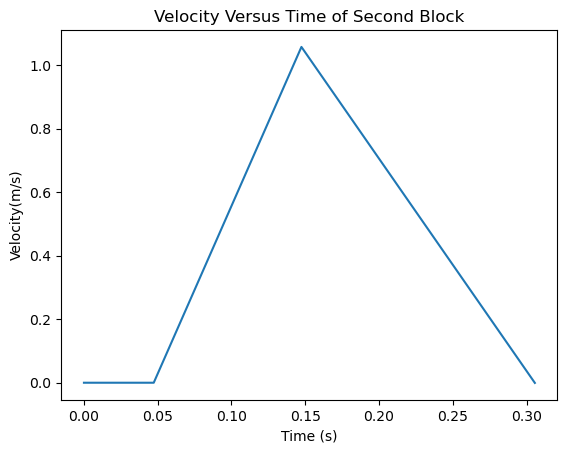

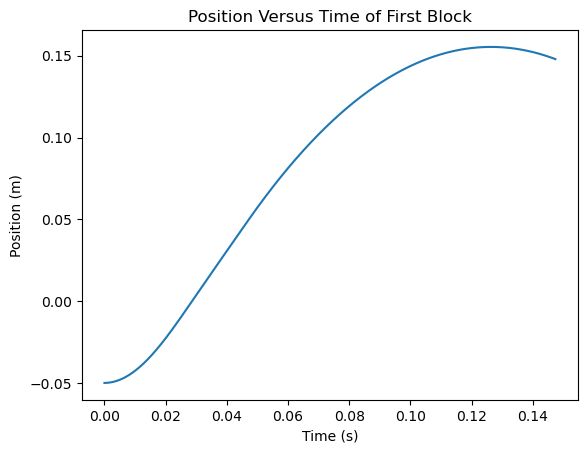

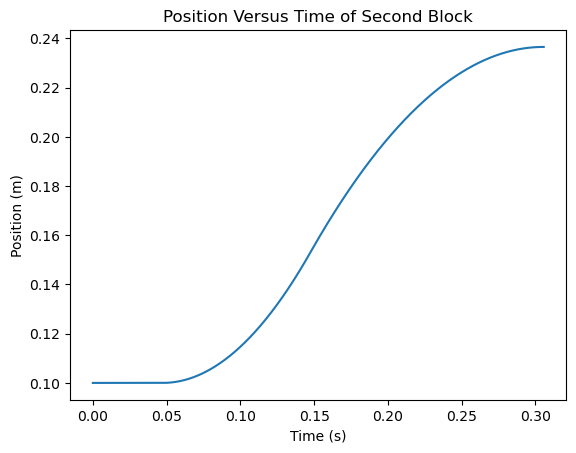

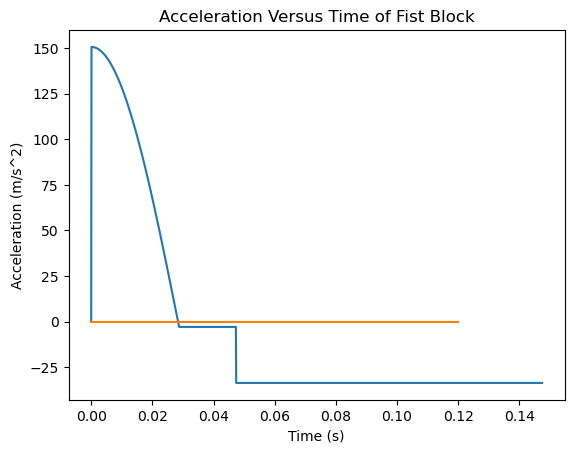

Final Velocity of First Block, Final Velocity of Second Block, Final Time of First Block, Final Time of Second Block, Final Position of the First Block, Final Position of Second Block
(-0.7064508918162155, -0.000607507176913272, 0.1474000000000001, 0.30559999999998266, 0.14796046123056558, 0.2365274378744023)


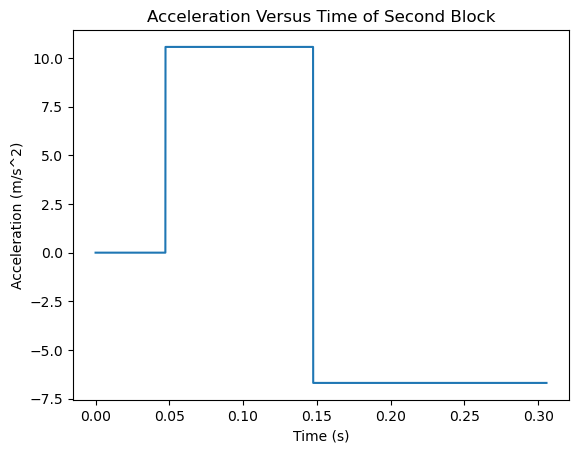

In [19]:
print(springsystem(0.0651,0.1481,0.1,2))

## Predictions

- By observation of the posisiton versus time graphs of the two objects, it can be noted that the final position for both objects was respectively 14.7 cm and 23.6 cm. 

- With an initial position of -5 cm for the first block and 10 cm for the second block (the origin being the point where the first block leaves the spring), the displacements are predicted at 19.7 cm and 13.6 cm respectively. 

## Measurements

Procedure: We will align the first block flush with the end of the spring scale. We position the second block 10 cm from the back end of the first block (the end touching the spring scale). The code accounts for 10 cm of distance traveled before impact. We will release and measure the displacement of the first block (from the end that was touching the spring scale) and the displacement of the second block (the distace the impact point has moved from ten centimeters). We will also use a force probe to record the average force applied during the collision and the time of impulse. We will do ten measurements.  

Instrument Uncertainties: 

Triple Beam Balance: $\pm0.01$ g

Force Probe: $\pm10$ N

Measuring Tape: $\pm0.5$ mm

Trials

Mass of Block One: 65.1 $\pm0.01$ g

Mass of Block Two 148.1 $\pm0.01$ g

Force Probe Uncertainty $\pm10 N$

Displacements in Centimeters, Force in Newtons, Time in Seconds

|Launch|Displacement of Block 1|Dispalcement of Block 2|Average Force of Collision|Time in Contact|
|:-:|:-:|:-:|:-:|:-:|
|1|17.5|7.5|1.85|0.168|
|2|15.2|7.9|1.578|0.133|
|3|16.0|9.2|1.23|NA|
|4|15.1|9.0|1.436|NA|
|5|16.7|8.0|1.455|0.182|
|6|13.2|6.7|1.750|0.159|
|7|13.2|7.1|1.426|0.194|
|8|13.0|7.2|1.983|0.132|
|9|13.0|6.8|1.847|0.201|
|10|15.0|7.5|1.557|0.186|





## Comparison

|Average Displacement Block 1|Average Displacement Block 2|Predicted Displacement Block 1|Predicted Displacement Block 1|
|:-:|:-:|:-:|:-:|
|14.59 cm|7.69 cm|19.7 cm|13.6 cm|

## Analysis

The averages of displacement for the two blocks are shorter than the prediction by 5.11 cm and 5.94 cm respectively. The code being longer than the measurements is likely for the following reasons: 

- The code models the blocks as point masses and our measurements where taken of extended bodies. Errors may have been committed in choosing where to take the measurements from on these objects. 

- The code assumes a perfectly one dimensional translation and collision. The blocks slid and yawed a lot in their journey. This may be do to variations in density in the wood, minor differences in air current as the object travels through the air, and inconsitencies in the texture of the wood and table. The coefficient of friction only represents an average "roughness" of the two surfaces. 

- The code did not account for air resistance as it was deemed to be negligible over such a short time and small object. 

## Conclusion

The code was a reasonably good approximation of the system. Possibilities for improvement include: accounting for the extended nature of the objects; incorporating a two dimensional model for the blocks motion; incorporating drag; anaylyzing the rotational equilibrium of the objects in order to predict where they may spin, pitch, and yaw; and measuring the precise coefficient of friction for the system. A more precise spring system with a known spring constant would be wise. The impromptu way we assembled our spring and taped the force probe to the block likely skewed the friction and through off the blocks. 

## Star Trek Quote

It is possible to commit no mistakes and still lose. That is not weakness. That is life. 